2022年1月17日 記載

初めまして、B4のTです。
JoSIMの使い方とPythonでWrapperを作成したのでこちらに記していきます。

In [6]:
netlist="""

*JSIM model
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)
.subckt squid        3  5 
L1                 3         1   2.65pH fcheck
L2                 3         4   2.65pH fcheck
*IB1                1         5  NOISE(2.6916p 0.0 1.0p) 
B1                 1         5  jjmod area=0.5
*IR1               1         5  NOISE(3.8737p 0.0 1.0p) 
R1                 1         5   15.45ohm
*IB2                2         5  NOISE(2.6916p 0.0 1.0p) 
B2                 2         5  jjmod area=0.5
*IR2               2         5  NOISE(3.8737p 0.0 1.0p) 
R2                 2         5   15.45ohm
B3                 4         2  jjmod area=10
R3                 4         2   0.2ohm
.ends

.subckt squid1        3  5 
L1                 3         1   2.65pH fcheck
L2                 3         4   2.65pH fcheck
*IB1                1         5  NOISE(2.6916p 0.0 1.0p) 
B1                 1         5  jjmod area=0.4
*IR1               1         5  NOISE(3.8737p 0.0 1.0p) 
R1                 1         5   15.45ohm
*IB2                2         5  NOISE(2.6916p 0.0 1.0p) 
B2                 2         5  jjmod area=0.4
*IR2               2         5  NOISE(3.8737p 0.0 1.0p) 
R2                 2         5   15.45ohm
B3                 4         2  jjmod area=10
R3                 4         2   0.2ohm
.ends
.subckt squid2        3  5 
L1                 3         1   2.65pH fcheck
L2                 3         4   2.65pH fcheck
*IB1                1         5  NOISE(2.6916p 0.0 1.0p) 
B1                 1         5  jjmod area=0.35
*IR1               1         5  NOISE(3.8737p 0.0 1.0p) 
R1                 1         5   15.45ohm
*IB2                2         5  NOISE(2.6916p 0.0 1.0p) 
B2                 2         5  jjmod area=0.35
*IR2               2         5  NOISE(3.8737p 0.0 1.0p) 
R2                 2         5   15.45ohm
B3                 4         2  jjmod area=10
R3                 4         2   0.2ohm
.ends
.subckt squid3        3  5 
L1                 3         1   2.65pH fcheck
L2                 3         4   2.65pH fcheck
*IB1                1         5  NOISE(2.6916p 0.0 1.0p) 
B1                 1         5  jjmod area=0.43
*IR1               1         5  NOISE(3.8737p 0.0 1.0p) 
R1                 1         5   15.45ohm
*IB2                2         5  NOISE(2.6916p 0.0 1.0p) 
B2                 2         5  jjmod area=0.43
*IR2               2         5  NOISE(3.8737p 0.0 1.0p) 
R2                 2         5   15.45ohm
B3                 4         2  jjmod area=10
R3                 4         2   0.2ohm
.ends
.subckt squid4        3  5 
L1                 3         1   2.65pH fcheck
L2                 3         4   2.65pH fcheck
*IB1                1         5  NOISE(2.6916p 0.0 1.0p) 
B1                 1         5  jjmod area=0.43
*IR1               1         5  NOISE(3.8737p 0.0 1.0p) 
R1                 1         5   15.45ohm
*IB2                2         5  NOISE(2.6916p 0.0 1.0p) 
B2                 2         5  jjmod area=0.43
*IR2               2         5  NOISE(3.8737p 0.0 1.0p) 
R2                 2         5   15.45ohm
B3                 4         2  jjmod area=10
R3                 4         2   0.2ohm
.ends
.subckt squid5        3  5 
L1                 3         1   2.65pH fcheck
L2                 3         4   2.65pH fcheck
*IB1                1         5  NOISE(2.6916p 0.0 1.0p) 
B1                 1         5  jjmod area=0.54
*IR1               1         5  NOISE(3.8737p 0.0 1.0p) 
R1                 1         5   15.45ohm
*IB2                2         5  NOISE(2.6916p 0.0 1.0p) 
B2                 2         5  jjmod area=0.54
*IR2               2         5  NOISE(3.8737p 0.0 1.0p) 
R2                 2         5   15.45ohm
B3                 4         2  jjmod area=10
R3                 4         2   0.2ohm
.ends
.subckt squid6        3  5 
L1                 3         1   2.65pH fcheck
L2                 3         4   2.65pH fcheck
*IB1                1         5  NOISE(2.6916p 0.0 1.0p) 
B1                 1         5  jjmod area=0.57
*IR1               1         5  NOISE(3.8737p 0.0 1.0p) 
R1                 1         5   15.45ohm
*IB2                2         5  NOISE(2.6916p 0.0 1.0p) 
B2                 2         5  jjmod area=0.57
*IR2               2         5  NOISE(3.8737p 0.0 1.0p) 
R2                 2         5   15.45ohm
B3                 4         2  jjmod area=10
R3                 4         2   0.2ohm
.ends
.subckt HFQ_bias         1  3  4
L1               1        2   12.5pH fcheck
L2               2        3   12.5pH fcheck
R1               2        4   80ohm
.ends
.subckt HFQ_bias1         1  3
L1               1        2   12.5pH fcheck
L2               2        3   12.5pH fcheck
.ends
.subckt HFQ_bias2         1  3  4
L1               1        2   7.5pH fcheck
L2               2        3   7.5pH fcheck
R1               2        4   157ohm
.ends
.subckt HFQ_bias3         1  3  4
L1               1        2   14pH fcheck
L2               2        3   1pH fcheck
R1               2        4   173ohm
.ends
.subckt DCHFQ 1 6 100
Vin               1        0   Pulse(0mV,25mV,400ps,10ps,10ps,100ps,400ps)
Rin               1        20   1050ohm
L01                20        2   2pH fcheck
L0                2        0   40pH fcheck
L1                2        21   2pH fcheck
X1       squid1    21        22
L3             22        33  4.00pH fcheck
L4             33        3   4.00pH fcheck
X2       squid2    3        0
L5             3        34  2.50pH fcheck
L6             34        4   16.00pH fcheck
X3       squid3         4  0
L7             4        35  7.0pH fcheck
L8             35        5   5.5pH fcheck
X4       squid         5  0
L9             5        6   15pH fcheck

R1               100      34  160ohm
R2               100      35  100ohm
.ends

.subckt JTL 2 10 100
X1       squid         2  0
X2       squid         3  0
X3       squid         4  0
X4       squid         5  0
X5       squid         6  0
X6       squid         7  0
X7       squid         8  0
X8       squid         9  0 

X11      HFQ_bias    2  3  100
X12      HFQ_bias1    3  4  
X13      HFQ_bias    4  5  100
X14      HFQ_bias1    5  6  
X15      HFQ_bias    6  7  100
X16      HFQ_bias1    7  8  
X17      HFQ_bias    8  9  100
X18      HFQ_bias1    9  10 
.ends

.subckt HFQDC 1 10 100
X1       squid         1  0
X2       squid         2  0
X3       squid         3  0
X4       squid         4  0 

X15      HFQ_bias    1  2  100
X16      HFQ_bias1    2  3  
X17      HFQ_bias2    3  4  100
X18      HFQ_bias3    4  7  100

L6               7        8   4pH fcheck
L7               7        9   6pH fcheck


R7                100         10 205ohm
R8                200         19 110ohm
Vb                100         0 pwl(0ps 0uV 100ps 2.5mV)
Vb2                200         0 pwl(0ps 0uV 100ps 2.5mV)


X6       squid4    8        10
X7       squid4    9        11
L8               10        12   1pH fcheck
L80               12        14   2pH fcheck
L9               11        13   1pH fcheck
L90               13        15   1pH fcheck
L10               12        16   40pH fcheck
L11               16        13   40pH fcheck

X8       squid5   14        0
X9       squid6   15        0
L12               16        17   1pH fcheck
X10       squid1     17       18
L2             18        188   1.00pH fcheck
L3             188        19   0.10pH fcheck
X11       squid1    19        0
*L14               19       20   9pH fcheck
*L15               20       0   3.5pH fcheck
L4                16        21   1.00pH fcheck
R1               21       0  2ohm

.ends

*** top cell: Comparator
X0       DCHFQ         1  2 100
X1       JTL           2  3 100
X2       HFQDC         3  4 100


*** netlist file ***

*** jsim input file ***
.tran 1ps 3000ps 0ps 1ps

*.file OUT1

*.print devv  X1_X1_B1
*.print devi  X1_X1_B1
*.print phase  X1_X1_B1

*.print devv  X1_X1_B2
*.print devi  X1_X1_B2
*.print phase  X1_X1_B2

*.print devv  X1_X5_B1
*.print devi  X1_X5_B1
*.print phase  X1_X5_B1

*.print devv  X1_X5_B2
*.print devi  X1_X5_B2
*.print phase  X1_X5_B2

*.print devv  X2_X6_B1
*.print devi  X2_X6_B1
*.print phase  X2_X6_B1

*.print devv  X2_X6_B2
*.print devi  X2_X6_B2
*.print phase  X2_X6_B2

*.print devv  X2_X7_B1
*.print devi  X2_X7_B1
*.print phase  X2_X7_B1

*.print devv  X2_X7_B2
*.print devi  X2_X7_B2
*.print phase  X2_X7_B2

*.print devv  X2_X8_B1
*.print devi  X2_X8_B1
*.print phase  X2_X8_B1

*.print devv  X2_X8_B2
*.print devi  X2_X8_B2
*.print phase  X2_X8_B2

*.print devv  X2_X9_B1
*.print devi  X2_X9_B1
.print phase  B1|X9|X2

*.print devv  X2_X9_B2
*.print devi  X2_X9_B2
.print phase  B2|X9|X2

*.print devv  X2_X11_B1
*.print devv  X2_X11_B2

*.print nodev 3_7 0 *(V0)
*.print nodev 3_14 0 *(V3)
*.print nodev 3_15 0 *(V4)
*.print nodev 3_19 0 *(V6)
*.print devi  X2_L10
*.print devi  X2_L2
*.print devi  X2_L3
*** jsim input file ***
"""

# Show the netlist data
print(netlist)



*JSIM model
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)
.subckt squid        3  5 
L1                 3         1   2.65pH fcheck
L2                 3         4   2.65pH fcheck
*IB1                1         5  NOISE(2.6916p 0.0 1.0p) 
B1                 1         5  jjmod area=0.5
*IR1               1         5  NOISE(3.8737p 0.0 1.0p) 
R1                 1         5   15.45ohm
*IB2                2         5  NOISE(2.6916p 0.0 1.0p) 
B2                 2         5  jjmod area=0.5
*IR2               2         5  NOISE(3.8737p 0.0 1.0p) 
R2                 2         5   15.45ohm
B3                 4         2  jjmod area=10
R3                 4         2   0.2ohm
.ends

.subckt squid1        3  5 
L1                 3         1   2.65pH fcheck
L2                 3         4   2.65pH fcheck
*IB1                1         5  NOISE(2.6916p 0.0 1.0p) 
B1         

pyjosimという簡単なJoSIMのWrapperパッケージを作成しました。こちらをインポートしてください。

In [7]:
from pyjosim.pyjosim import simulation

df = simulation(netlist)

print(df)

              P(B1|X9|X2)  P(B2|X9|X2)
time                                  
0.000000e+00     0.000000     0.000000
1.000000e-12     0.000264     0.000261
2.000000e-12     0.000863     0.000848
3.000000e-12     0.001553     0.001521
4.000000e-12     0.002213     0.002160
...                   ...          ...
2.995000e-09     0.074456     0.071657
2.996000e-09     0.074456     0.071657
2.997000e-09     0.074456     0.071657
2.998000e-09     0.074456     0.071657
2.999000e-09     0.074456     0.071657

[3000 rows x 2 columns]


<AxesSubplot:xlabel='time'>

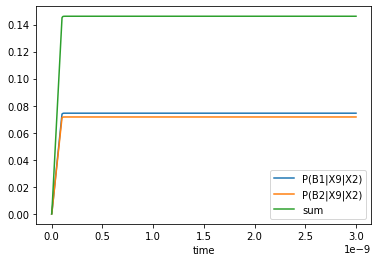

In [9]:
df['sum']=df['P(B1|X9|X2)'] + df['P(B2|X9|X2)']
df.plot()